<a href="https://colab.research.google.com/github/jacqueslethuaut/AllLifeBankCustomerSegmentation/blob/main/SoloTraveller01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shinkansen Travel Experience
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train

Team:
- Raghavendar Lokineni
- Jacques Le Thuaut

## Initialisation

In [1]:
USING_GOOGLE_COLAB = True
HACKATHON_DATA = '/Hackathon'
TRAVEL_DATA_TRAIN = '/Traveldata_train_(1).csv'
TRAVEL_DATA_TEST = '/Traveldata_test_(1).csv'
SURVEY_DATA_TRAIN = '/Surveydata_train_(1).csv'
SURVEY_DATA_TEST = '/Surveydata_test_(1).csv'
DATA_DICTIONNARY = '/Data_Dictionary_(1).xlsx'

## Connecting to Google Drive

In [2]:
if USING_GOOGLE_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


## Loading librairies

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data


In [4]:
travel_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + TRAVEL_DATA_TRAIN)
travel_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + TRAVEL_DATA_TEST)
survey_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + SURVEY_DATA_TRAIN)
survey_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + SURVEY_DATA_TEST)

## Print shape of datasets

### travel data train

In [5]:
print(travel_data_train.head())
print(travel_data_train.tail())

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0  
             ID Gender   Customer_Type   Age      Type_Travel Travel_Class  \
94374  98894375   Male  Loyal Customer  32.0  Business Tr

In [6]:
travel_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [7]:
travel_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


Verify that ID column contains non duplicated ID

In [8]:
travel_data_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [9]:
100.0 * travel_data_train.isnull().sum() / travel_data_train.shape[0]

ID                         0.000000
Gender                     0.081586
Customer_Type              9.484101
Age                        0.034965
Type_Travel                9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.060395
Arrival_Delay_in_Mins      0.378262
dtype: float64

In [10]:
len(travel_data_train['ID'].unique())

94379

First observations :
- the train dataset contains 94379 events with unique ID (column 'ID')
- 8 other columns have been populated 
  - Gender with 77 missing values (~0.1%)
  - Customer_Type with 8951 missing values (~10%)
  - Age (range 7 - 85) with 33 missing values (~0.03%)
  - Type_Travel with 9226 missing values (~10%)
  - Travel_Class with no missing value
  - Travel_Distance (range 50 - 6951) with no missing value
  - Departure_Delay_in_Mins (range 0 - 1592) with 57 missing values (~0.06%)
  - Arrival_Delay_in_Mins (range 0 - 1584) with 357 missing values (~0.38%) => note : this is almost the same range as departure. Could be useful for missing values

Verify values of 'Gender', 'Customer_Type', 'Type_Travel\', 'Travel_Class'

In [11]:
print('values of Gender')
print(travel_data_train['Gender'].unique())
print('values of Customer_Type')
print(travel_data_train['Customer_Type'].unique())
print('values of Type_Travel')
print(travel_data_train['Type_Travel'].unique())
print('values of Travel_Class')
print(travel_data_train['Travel_Class'].unique())

values of Gender
['Female' 'Male' nan]
values of Customer_Type
['Loyal Customer' 'Disloyal Customer' nan]
values of Type_Travel
[nan 'Personal Travel' 'Business Travel']
values of Travel_Class
['Business' 'Eco']


Next observation :
- Once nan fixed, 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class' can be encoded




### survey data train

In [12]:
print(survey_data_train.head())
print(survey_data_train.tail())

         ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improv

In [13]:
survey_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [14]:
survey_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [15]:
travel_data_train['ID'].equals(survey_data_train['ID'])

True

All events in survey_data_train and travel_data_train share the same IDs


Verify values of 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'

In [16]:
print('values of Seat_Comfort')
print(survey_data_train['Seat_Comfort'].unique())
print('values of Seat_Class')
print(survey_data_train['Seat_Class'].unique())
print('values of Arrival_Time_Convenient')
print(survey_data_train['Arrival_Time_Convenient'].unique())
print('values of Catering')
print(survey_data_train['Catering'].unique())
print('values of Platform_Location')
print(survey_data_train['Platform_Location'].unique())
print('values of Onboard_Wifi_Service')
print(survey_data_train['Onboard_Wifi_Service'].unique())
print('values of Legroom')
print(survey_data_train['Legroom'].unique())
print('values of Baggage_Handling')
print(survey_data_train['Baggage_Handling'].unique())
print('values of CheckIn_Service')
print(survey_data_train['CheckIn_Service'].unique())
print('values of Cleanliness')
print(survey_data_train['Cleanliness'].unique())
print('values of Online_Boarding')
print(survey_data_train['Online_Boarding'].unique())



values of Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan]
values of Seat_Class
['Green Car' 'Ordinary']
values of Arrival_Time_Convenient
['Excellent' 'Needs Improvement' 'Acceptable' nan 'Good' 'Poor'
 'Extremely Poor']
values of Catering
['Excellent' 'Poor' 'Needs Improvement' nan 'Acceptable' 'Good'
 'Extremely Poor']
values of Platform_Location
['Very Convenient' 'Needs Improvement' 'Manageable' 'Inconvenient'
 'Convenient' nan 'Very Inconvenient']
values of Onboard_Wifi_Service
['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor'
 'Extremely Poor' nan]
values of Legroom
['Acceptable' 'Needs Improvement' 'Excellent' 'Good' 'Poor'
 'Extremely Poor' nan]
values of Baggage_Handling
['Needs Improvement' 'Poor' 'Excellent' 'Acceptable' 'Good' nan]
values of CheckIn_Service
['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor' nan
 'Extremely Poor']
values of Cleanliness
['Needs Improvement' 'Good' 'Excellent' 'Acceptable' 'Poo

The values of 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding' can be encoded (once nan values fixed)


### train parts : merge survey dataset and travel dataset

In [23]:
train_dataset = pd.merge(travel_data_train, survey_data_train, on='ID')

### Descriptive statistics on train dataset (merged one)

In [24]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

The first feature is useless so we can drop it

In [26]:
train_dataset = train_dataset.drop(train_dataset.iloc[:,[0]], axis = 1)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_Type            85428 non-null  object 
 1   Age                      94346 non-null  float64
 2   Type_Travel              85153 non-null  object 
 3   Travel_Class             94379 non-null  object 
 4   Travel_Distance          94379 non-null  int64  
 5   Departure_Delay_in_Mins  94322 non-null  float64
 6   Arrival_Delay_in_Mins    94022 non-null  float64
 7   Overall_Experience       94379 non-null  int64  
 8   Seat_Comfort             94318 non-null  object 
 9   Seat_Class               94379 non-null  object 
 10  Arrival_Time_Convenient  85449 non-null  object 
 11  Catering                 85638 non-null  object 
 12  Platform_Location        94349 non-null  object 
 13  Onboard_Wifi_Service     94349 non-null  object 
 14  Onboard_Entertainment 

Prepare categorical indices

In [29]:
categorical_indexes = [0, 2, 3] + list(range(8, 23))
train_dataset.iloc[:,categorical_indexes] = train_dataset.iloc[:,categorical_indexes].astype('category')
train_dataset.describe(include=['category']).T

,count,unique,top,freq
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446


'Overall_Experience' is the target variable. Let's look the ratio of the target variable

In [37]:
satisfaction_dataset = train_dataset['Overall_Experience']
train_dataset = train_dataset.drop(['Overall_Experience'], axis = 1)
train_dataset.describe(include=['category']).T

,count,unique,top,freq
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446


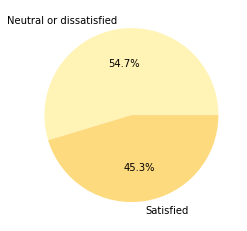

In [38]:
plt.pie(satisfaction_dataset.value_counts(), 
        labels = ["Neutral or dissatisfied", "Satisfied"], 
        colors = sns.color_palette("YlOrBr"), 
        autopct = '%1.1f%%')
pass

The target is more or less well-balanced

Matrix of correlation of quantitative features

In [39]:
train_corr_mat = train_dataset.corr()
train_corr_mat

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Age,1.000000,-0.251570,-0.007973,-0.010610
Travel_Distance,-0.251570,1.000000,0.114174,0.111317
Departure_Delay_in_Mins,-0.007973,0.114174,1.000000,0.965483
Arrival_Delay_in_Mins,-0.010610,0.111317,0.965483,1.000000


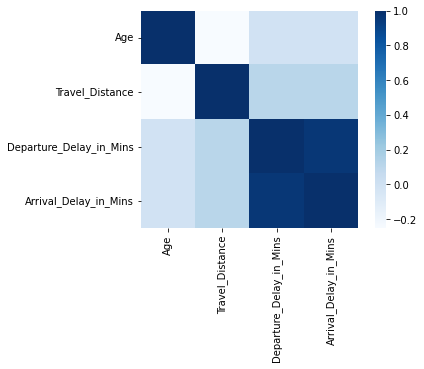

In [40]:
sns.heatmap(train_corr_mat, square = True, cmap = 'Blues')
pass

Observations :
- as expected, there is a strong correlation between Departure_Delay_in_Mins and Arrival_Delay_in_Mins

In [43]:
train_corr_mat.where(np.triu(train_corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure_Delay_in_Mins  Arrival_Delay_in_Mins    0.965483
dtype: float64

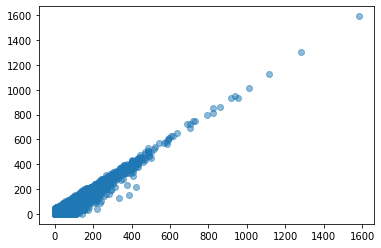

In [44]:
plt.scatter(train_dataset['Arrival_Delay_in_Mins'], train_dataset['Departure_Delay_in_Mins'], alpha = 0.5)
pass

It is clear that the dependance between arrival delay time and Departure delay time is linear